## INF2178 Assignment1
## Yunfan Liu
## #1010006459

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_excel("/Users/yunfanliu/Desktop/data.xlsx")#read the data with currect path
data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [3]:
# select columns we may need
df = pd.DataFrame(data, columns=['OCCUPANCY_DATE','CAPACITY_TYPE','PROGRAM_MODEL','SERVICE_USER_COUNT','CAPACITY_ACTUAL_BED','OCCUPIED_BEDS','CAPACITY_ACTUAL_ROOM','OCCUPIED_ROOMS'])
df.head()

,OCCUPANCY_DATE,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,2021-01-01,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,2021-01-01,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,2021-01-01,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,2021-01-01,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0


In [4]:
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OCCUPANCY_DATE        50944 non-null  datetime64[ns]
 1   CAPACITY_TYPE         50944 non-null  object        
 2   PROGRAM_MODEL         50942 non-null  object        
 3   SERVICE_USER_COUNT    50944 non-null  int64         
 4   CAPACITY_ACTUAL_BED   32399 non-null  float64       
 5   OCCUPIED_BEDS         32399 non-null  float64       
 6   CAPACITY_ACTUAL_ROOM  18545 non-null  float64       
 7   OCCUPIED_ROOMS        18545 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
#Convert datetime into index

#df["OCCUPANCY_DATE"] = pd.to_datetime(df["OCCUPANCY_DATE"])#Date-Time Data Type
df = df.set_index("OCCUPANCY_DATE") 

Since the number of  missing values in 'PROGRAM_MODEL' is small relative to the number of the entire dataset, I consider removing rows containing missing values

In [7]:
# Drop the missing value
df = df.dropna(subset = ['PROGRAM_MODEL'])

There are missing values in "CAPACITY_ACTUAL_BED", "OCCUPIED_BEDS", "CAPACITY_ACTUAL_ROOM" and "OCCUPIED_ROOMS". This is due to the fact that some shelters offer only beds and not  rooms, or only  rooms and not beds. In other words, these missing values may represent data errors. For these missing values, I consider using zero to indicate that the corresponding bed or room was not provided.

In [8]:
# Fill the missing value 
df[['CAPACITY_ACTUAL_BED','OCCUPIED_BEDS','CAPACITY_ACTUAL_ROOM','OCCUPIED_ROOMS']] = df[['CAPACITY_ACTUAL_BED','OCCUPIED_BEDS','CAPACITY_ACTUAL_ROOM','OCCUPIED_ROOMS']].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50942 entries, 2021-01-01 to 2021-12-31
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CAPACITY_TYPE         50942 non-null  object 
 1   PROGRAM_MODEL         50942 non-null  object 
 2   SERVICE_USER_COUNT    50942 non-null  int64  
 3   CAPACITY_ACTUAL_BED   50942 non-null  float64
 4   OCCUPIED_BEDS         50942 non-null  float64
 5   CAPACITY_ACTUAL_ROOM  50942 non-null  float64
 6   OCCUPIED_ROOMS        50942 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
df.head()

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
OCCUPANCY_DATE,,,,,,,
2021-01-01,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0
2021-01-01,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0
2021-01-01,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0
2021-01-01,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0
2021-01-01,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0


# 2. EDA

## 2.1 Monthly Service User

OCCUPANCY_DATE
2021-01-31    186900
2021-02-28    169838
2021-03-31    185015
2021-04-30    174005
2021-05-31    184656
2021-06-30    184552
2021-07-31    196321
2021-08-31    199664
2021-09-30    197151
2021-10-31    211510
2021-11-30    213981
2021-12-31    225909
Freq: M, Name: SERVICE_USER_COUNT, dtype: int64


/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/3291574220.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_serviceuser_trend = df.resample("M").sum()["SERVICE_USER_COUNT"]#Monthly service user counts


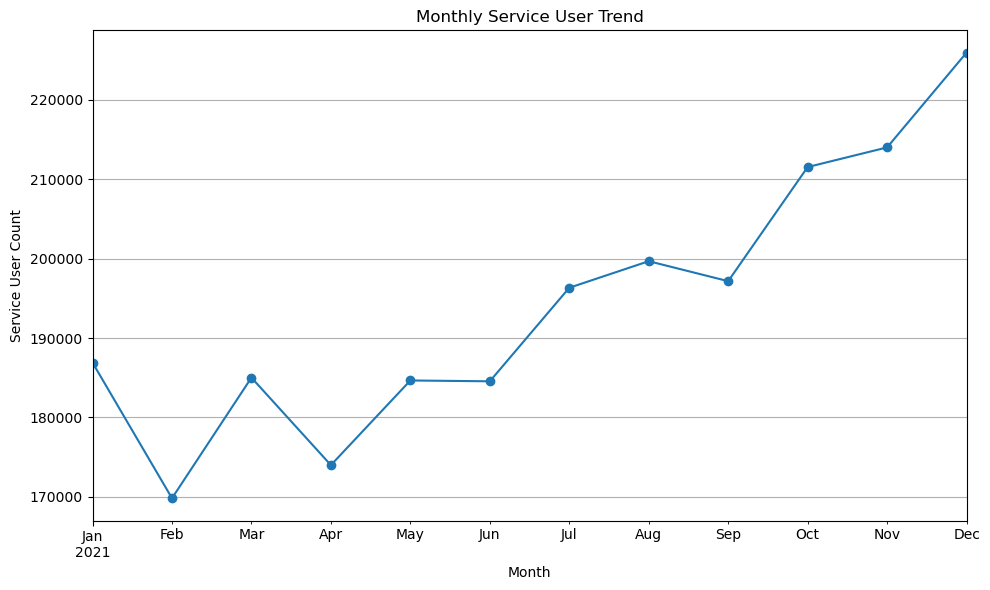

In [10]:
#Monthly service user count trend
monthly_serviceuser_trend = df.resample("M").sum()["SERVICE_USER_COUNT"]#Monthly service user counts
print(monthly_serviceuser_trend)
#LinePlot
plt.figure(figsize=(10, 6))
monthly_serviceuser_trend.plot(kind='line', marker='o')
plt.title('Monthly Service User Trend')
plt.xlabel('Month')
plt.ylabel('Service User Count')
plt.grid(True)
plt.tight_layout()

plt.show()

The "Monthly Service User Trend" plot shows that the user demand for shelter services appears to be on a gradual upward trend. 
There were repeated fluctuations in demand from the beginning of the year to the middle of the year, with February being a relatively low month, while demand gradually picked up thereafter. Demand increased significantly into the second half of the year, reaching its highest point of the year in November and December. This may reflect the impact of certain seasonal factors or an increase in demand caused by specific events or policy changes.

## 2.2  Monthly Utilization for Capacity Type

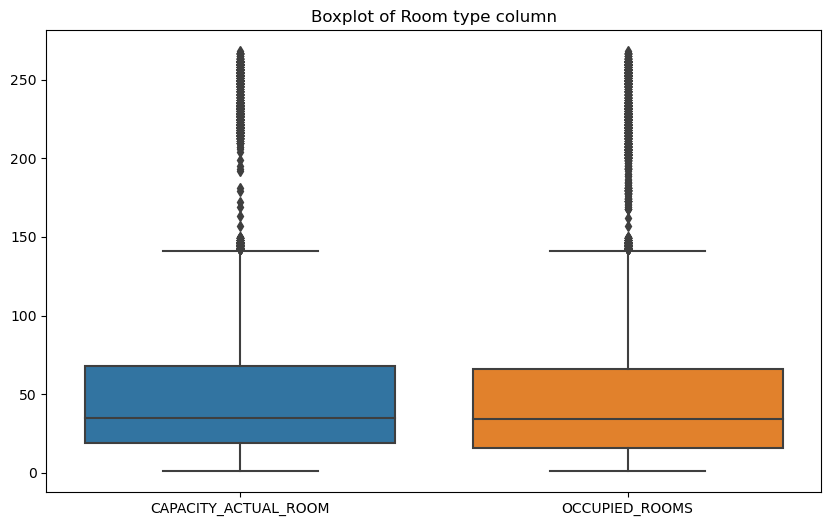

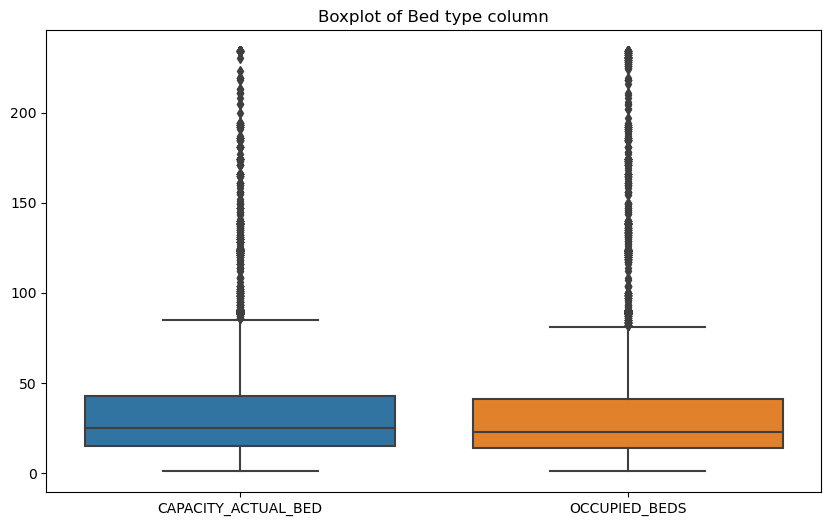

In [11]:
# Split df by program_model
type_room_based = df[df["CAPACITY_TYPE"]=="Room Based Capacity"]
type_room_based = pd.DataFrame(type_room_based, columns=['CAPACITY_TYPE','PROGRAM_MODEL','CAPACITY_ACTUAL_ROOM','OCCUPIED_ROOMS'])#choose relative columns 
type_bed_based = df[df["CAPACITY_TYPE"]=="Bed Based Capacity"]
type_bed_based = pd.DataFrame(type_bed_based,columns=['CAPACITY_TYPE','PROGRAM_MODEL','CAPACITY_ACTUAL_BED','OCCUPIED_BEDS'])#choose relative columns 
#outlier of Room Based Capacity with Boxplot 
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=type_room_based)
plt.title("Boxplot of Room type column")  
plt.show()
#outlier of Bed Based Capacity with Boxplot 
plt.figure(figsize = (10,6))
sns.boxplot(data=type_bed_based)
plt.title("Boxplot of Bed type column")  
plt.show()

As this data is social in nature, it can reflect the complexity and diversity of the real world. In other word, outliers may result from real, valid observations rather than from measurement errors or entry errors. Second, the retention of outliers at the EDA stage provides a comprehensive understanding of the characteristics of the data. I consider the retention of outliers.

                Monthly Rate Room  Monthly Rate Bed
OCCUPANCY_DATE                                     
2021-01-31               0.950698          0.939698
2021-02-28               0.957830          0.954504
2021-03-31               0.945268          0.951866
2021-04-30               0.934290          0.937592
2021-05-31               0.926272          0.922235


/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/926295575.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_occupied_room = type_room_based.resample("M").sum()["OCCUPIED_ROOMS"]#Monthly occupied rooms counts
/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/926295575.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_actual_room = type_room_based.resample("M").sum()["CAPACITY_ACTUAL_ROOM"]#Monthly actual rooms counts
/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/926295575.py:6: FutureWarning: The default value of numeric_only in DataFrameGr

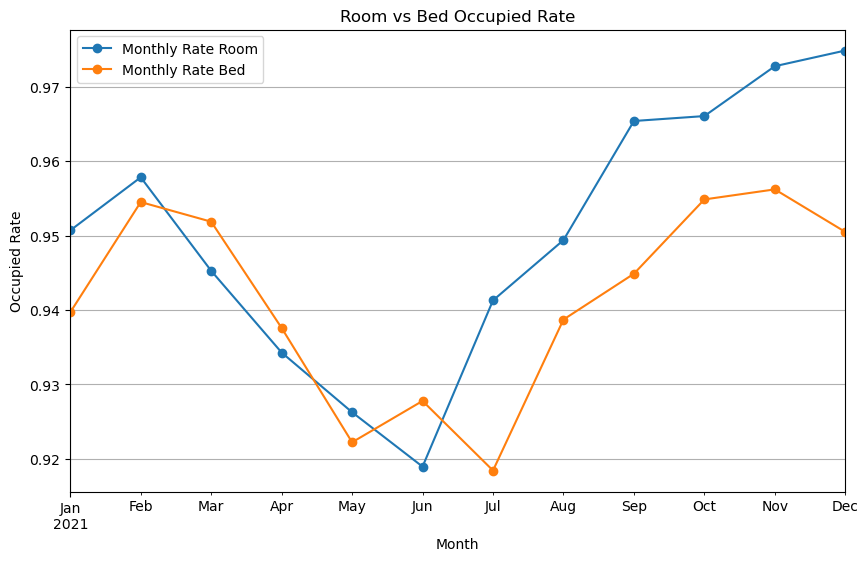

In [12]:
# calculate the monthly rate of occupied for each type
monthly_occupied_room = type_room_based.resample("M").sum()["OCCUPIED_ROOMS"]#Monthly occupied rooms counts
monthly_actual_room = type_room_based.resample("M").sum()["CAPACITY_ACTUAL_ROOM"]#Monthly actual rooms counts
monthly_rate_room = monthly_occupied_room/monthly_actual_room #Monthly rate of occupied rooms counts
monthly_rate_room = pd.DataFrame({"Monthly Rate Room":monthly_rate_room})
monthly_occupied_bed = type_bed_based.resample("M").sum()["OCCUPIED_BEDS"]#Monthly occupied bed counts
monthly_actual_bed = type_bed_based.resample("M").sum()["CAPACITY_ACTUAL_BED"]#Monthly actual bed counts
monthly_rate_bed = monthly_occupied_bed/monthly_actual_bed#Monthly rate of occupied bed counts
monthly_rate_bed = pd.DataFrame({"Monthly Rate Bed":monthly_rate_bed})
monthly_rate_RoomBed = pd.concat([monthly_rate_room,monthly_rate_bed],axis=1)
print(monthly_rate_RoomBed.head())
      
#Lineplot:two occupied rate comparsion
monthly_rate_RoomBed.plot(marker='o',figsize=(10,6))
plt.title("Room vs Bed Occupied Rate")
plt.xlabel("Month")
plt.ylabel('Occupied Rate')
plt.grid(True)
plt.show()



This graph compares the different trends that different capacity types (room-based and bed-based) show in utilization over the course of a year. Overall, both room-based and bed-based utilization showed a brief upward trend at the beginning of the year. After February, both capacity types showed a downward trend, probably due to the arrival of the summer season when temperatures warmed up and people relied less on shelter accommodations. However, starting in June and continuing through the end of the year, room utilization and bed utilization rates continued to rise, especially peaking at the end of the year, which may be related to the increased demand for value accommodation as the winter weather became colder. It is interesting to note that the room utilization rate is overall lower than the bed utilization rate prior to June, but higher than the bed utilization rate after June, which may also be due to seasonal effects, market prices, or holiday changes.

## 2.3 Average Occupancy Rate by Program Model and Capacity Type

In [13]:
#calculation of average bed/room occupancy rates under different program models

emergency_model = df[df["PROGRAM_MODEL"]=="Emergency"]
emergency_room_model = emergency_model[emergency_model["CAPACITY_TYPE"] == "Room Based Capacity"]
emergency_room_model_count = emergency_room_model["OCCUPIED_ROOMS"].count()
emergency_room_rate = round(((emergency_room_model["OCCUPIED_ROOMS"]/ emergency_room_model["CAPACITY_ACTUAL_ROOM"]).sum())/emergency_room_model_count,4)
print("Emergency program model average room occupancy rate: ",emergency_room_rate)

emergency_bed_model = emergency_model[emergency_model["CAPACITY_TYPE"] == "Bed Based Capacity"]
emergency_bed_model_count = emergency_bed_model["OCCUPIED_BEDS"].count()
emergency_bed_rate = round(((emergency_bed_model["OCCUPIED_BEDS"]/ emergency_bed_model["CAPACITY_ACTUAL_BED"]).sum())/emergency_bed_model_count,4)
print("Emergency program model average bed occupancy rate: ",emergency_bed_rate)

transitional_model = df[df["PROGRAM_MODEL"]=="Transitional"]
transitional_room_model = transitional_model[transitional_model["CAPACITY_TYPE"] == "Room Based Capacity"]
transitional_room_model_count = transitional_room_model["OCCUPIED_ROOMS"].count()
transitional_room_rate = round(((transitional_room_model["OCCUPIED_ROOMS"]/ transitional_room_model["CAPACITY_ACTUAL_ROOM"]).sum())/transitional_room_model_count,4)
print("Transitional program model average room occupancy rate: ",transitional_room_rate)

transitional_bed_model = transitional_model[transitional_model["CAPACITY_TYPE"] == "Bed Based Capacity"]
transitional_bed_model_count = transitional_bed_model["OCCUPIED_BEDS"].count()
transitional_bed_rate = round(((transitional_bed_model["OCCUPIED_BEDS"]/ transitional_bed_model["CAPACITY_ACTUAL_BED"]).sum())/transitional_bed_model_count,4)
print("Transitional program model average bed occupancy rate: ",transitional_bed_rate)


Emergency program model average room occupancy rate:  0.9386
Emergency program model average bed occupancy rate:  0.9435
Transitional program model average room occupancy rate:  0.8232
Transitional program model average bed occupancy rate:  0.8852


  Program Model  Average Bed Occupancy Rate  Average Room Occupancy Rate
0     Emergency                      0.9435                       0.9386
1  Transitional                      0.8852                       0.8232


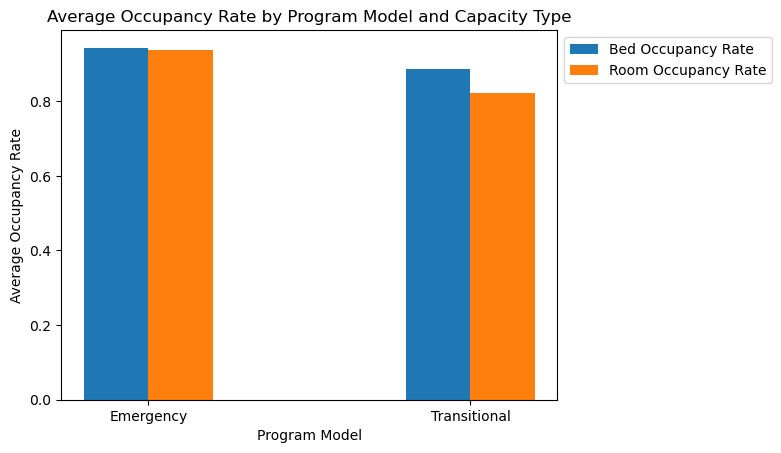

In [14]:
df_model_rate = pd.DataFrame({
    "Program Model":['Emergency','Transitional'],
    "Average Bed Occupancy Rate":[emergency_bed_rate,transitional_bed_rate],
    "Average Room Occupancy Rate":[emergency_room_rate,transitional_room_rate]})
print(df_model_rate)

# #Plot grouped bar chart
fig, ax = plt.subplots()

positions = list(range(len(df_model_rate['Program Model']))) # calculate the position of the bar
ax.bar(positions, df_model_rate['Average Bed Occupancy Rate'], width=0.2, label='Bed Occupancy Rate')
ax.bar([p + 0.2 for p in positions], df_model_rate['Average Room Occupancy Rate'], width=0.2, label='Room Occupancy Rate')

ax.set_title('Average Occupancy Rate by Program Model and Capacity Type')
ax.set_xlabel('Program Model')
ax.set_ylabel('Average Occupancy Rate')
ax.set_xticks([p + 0.2 / 2 for p in positions])  
ax.set_xticklabels(df_model_rate['Program Model'])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

The grouped bar charts show that the emergency model has a very high bed and room occupancy rate, reflecting its critical role in meeting emergency needs. The Transitional model also has a high bed occupancy rate, but a relatively low room occupancy rate, which may indicate that users in this type of model are more reliant on beds than rooms with provided services. These data suggest that both models have high occupancy rates of shelter resources, which are almost full, and may require service providers to consider expanding capacity or improving the allocation of shelter resources to meet continued high demand.

# T-test

Since the sample size is large, the distribution of the sample mean tends to be normally distributed according to the central limit theorem, even if the original data itself is not normally distributed.

## 3.1 Significant Differences Between Bed Occupancy Rates for Emergency and Transitional Program Models

In [15]:
#Significant Differences Between Bed Occupancy Rates for Emergency and Transitional Program Models
emergency_bed_model = emergency_model[emergency_model["CAPACITY_TYPE"] == "Bed Based Capacity"]
emergency_bed_model["OCCUPIED_BEDE_RATE"] = (emergency_bed_model["OCCUPIED_BEDS"]/ emergency_bed_model["CAPACITY_ACTUAL_BED"])
emergency_bed_rates = emergency_bed_model["OCCUPIED_BEDE_RATE"]

transitional_bed_model = transitional_model[transitional_model["CAPACITY_TYPE"] == "Bed Based Capacity"]
transitional_bed_model["OCCUPIED_BEDT_RATE"] = (transitional_bed_model["OCCUPIED_BEDS"]/ transitional_bed_model["CAPACITY_ACTUAL_BED"])
transitional_bed_rates = transitional_bed_model["OCCUPIED_BEDT_RATE"]

stats.levene(emergency_bed_rates, transitional_bed_rates)#variance chi-square test


/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/2472040480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emergency_bed_model["OCCUPIED_BEDE_RATE"] = (emergency_bed_model["OCCUPIED_BEDS"]/ emergency_bed_model["CAPACITY_ACTUAL_BED"])
/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/2472040480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitional_bed_model["OCCUPIED_BEDT_RATE"] = (transitional_bed_model["OCCUPIED_BEDS"]/ transitional_bed_model["CAPACITY_ACTUAL_

LeveneResult(statistic=762.9983194781761, pvalue=5.049399003875328e-166)

If the p-value ≤ 0.05, there is sufficient evidence of unequal variances and Welch's t-test should be used

In [16]:
t_value, p_value = stats.ttest_ind(emergency_bed_rates, transitional_bed_rates,equal_var=False) #t-test
print(f't-test: {t_value}, p-value: {p_value}')

t-test: 36.78483679745313, p-value: 7.273950955976339e-283


According to the t-test results, there was a significant difference (p < 0.05) between the emergency and transitional program models in terms of bed occupancy. This suggests that the two models demonstrated different effectiveness in meeting bed demand. However, due to the large size of this sample, even a small actual difference may result in statistical significance, and further analysis of the effect size is needed to assess the actual significance of this difference, and thus, more correct planning for shelter services and resource allocation can be provided.

## 3.2 Significant Differences Between Room Occupancy Rates for Emergency and Transitional Program Models

In [17]:
#Significant Differences Between Room Occupancy Rates for Emergency and Transitional Program Models
emergency_room_model = emergency_model[emergency_model["CAPACITY_TYPE"] == "Room Based Capacity"]
emergency_room_model["OCCUPIED_ROOME_RATE"] = (emergency_room_model["OCCUPIED_ROOMS"]/ emergency_room_model["CAPACITY_ACTUAL_ROOM"])
emergency_room_rates = emergency_room_model["OCCUPIED_ROOME_RATE"]

transitional_room_model = transitional_model[transitional_model["CAPACITY_TYPE"] == "Room Based Capacity"]
transitional_room_model["OCCUPIED_ROOMT_RATE"] = (transitional_room_model["OCCUPIED_ROOMS"]/ transitional_room_model["CAPACITY_ACTUAL_ROOM"])
transitional_room_rates = transitional_room_model["OCCUPIED_ROOMT_RATE"]

stats.levene(emergency_bed_rates, transitional_bed_rates)#variance chi-square test


/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/2901408438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emergency_room_model["OCCUPIED_ROOME_RATE"] = (emergency_room_model["OCCUPIED_ROOMS"]/ emergency_room_model["CAPACITY_ACTUAL_ROOM"])
/var/folders/gt/s_15tdkd0zb9jhsnv6y6kzpm0000gn/T/ipykernel_11532/2901408438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitional_room_model["OCCUPIED_ROOMT_RATE"] = (transitional_room_model["OCCUPIED_ROOMS"]/ transitional_room_model["CAPAC

LeveneResult(statistic=762.9983194781761, pvalue=5.049399003875328e-166)

If the p-value ≤ 0.05, there is sufficient evidence of unequal variances and Welch's t-test should be used

In [18]:
t_stat, p_val = stats.ttest_ind(emergency_room_rates, transitional_room_rates, equal_var=False) #t-test
print(f't-test: {t_stat}, p-value: {p_val}')

t-test: 31.71080126309493, p-value: 4.425201973984325e-150


According to the t-test results, there was a significant difference (p < 0.05) between the emergency and transitional program models in terms of room occupancy. This suggests that the two models demonstrated different effectiveness in meeting room demand.However, due to the large size of this sample, even a small actual difference may result in statistical significance, and further analysis of the effect size is needed to assess the actual significance of this difference, and thus, more correct planning for shelter services and resource allocation can be provided.